**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'

/home/dhiman/Miniconda2/envs/westpa-2017.10/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.
Reanalyzing file assign.h5 for scheme TEST.
Reanalyzing file direct.h5 for scheme TEST.

Complete!
Setting iteration to iter 50.


In [2]:
# Set the iteration to the second to last one.
w.iteration = 50

# Access the current iteration dictionary, and return an interesting segment:
# the heaviest one in the current segment!
# Note that we can access either as attributes or dictionary keys!
# Attributes can be tab completed when running in console mode.
heaviest_segment = w.current.seg_id
print heaviest_segment.size
print('{} is the walker with the maximum weight!\n'.format(heaviest_segment))
# We can index the current iteration according to the seg_id...
print('Indexing according to a seg_id returns all properties on the segment.')
print('Children and parents have the same properties/keys.')
print(str(w.current[heaviest_segment]) + '\n')
# ... we can also see what its parents were like, or what any children are like, should they exist!
print('Where did it come from?  Does it have any descendents?')
print('{} is the parent!'.format(w.past[heaviest_segment].seg_id))
print('{} is/are the children!\n'.format(w.future[heaviest_segment].seg_id))

# We can see that the past/future objects are keyed to seg_ids in the CURRENT iteration, always.
# We can also see all available properties on the current iteration, and index THOSE according to a segment.
# As an example:
print('Can we index either way?')
print(str((w.current.pcoord[heaviest_segment] == w.current[heaviest_segment].pcoord)[0]) + '\n')

# w.current also contains the output from w_direct/w_reweight/w_assign for the current iteration.
# w.past contains the same output, from the prior iteration, keyed to the current seg_id
print('What properties exist in the current dictionary?')
print(w.current)

Setting iteration to iter 50.
35
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] is the walker with the maximum weight!

Indexing according to a seg_id returns all properties on the segment.
Children and parents have the same properties/keys.
None

Where did it come from?  Does it have any descendents?


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [3]:
# Let's trace our heaviest walker to see its history!
hs_trace = w.trace(heaviest_segment.all())
print('What data can we access from our trace for segment {}?'.format(heaviest_segment))
print(hs_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(hs_trace['pcoord'])
plt.show()
plt.plot(np.log10(hs_trace['weights']))
plt.show()
# We can plot the state changes over time, too, if we wanted.
plt.plot(hs_trace['states'])

UnboundLocalError: local variable 'count' referenced before assignment

State labels and definitions!
0: unbound
1: bound
2: Unknown
None


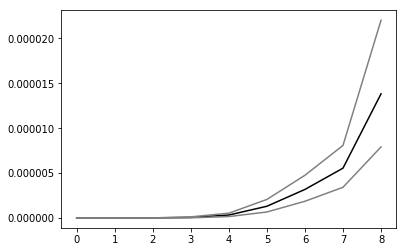

Rate evolution from state 0 to 1


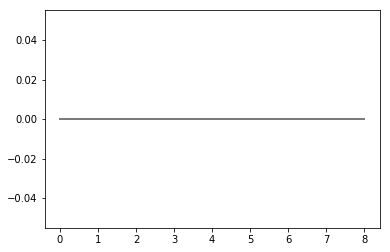

Rate evolution from state 1 to 0


In [48]:
# There's a built in plotting interface that can be used to plot interesting things!
# Try running this command directly from the terminal in w_ipa.
print(w.state_labels)
w.current.direct.rate_evolution.plot(interface='matplotlib')
print("Rate evolution from state 0 to 1")
w.current.direct.rate_evolution.plot(1,0,interface='matplotlib')
print("Rate evolution from state 1 to 0")

In [4]:
print (hs_trace['weights'])

NameError: name 'hs_trace' is not defined

In [26]:
print (hs_trace['weights']).size

1


In [21]:
print w.trace()

TypeError: trace() takes exactly 2 arguments (1 given)

In [32]:
print w

In [36]:
help(w)

Help on WIPI in module w_ipa object:

class WIPI(westtools.core.WESTParallelTool)
 |  Welcome to w_ipa (WESTPA Interactive Python Analysis)!
 |  From here, you can run traces, look at weights, progress coordinates, etc.
 |  This is considered a 'stateful' tool; that is, the data you are pulling is always pulled
 |  from the current analysis scheme and iteration.
 |  By default, the first analysis scheme in west.cfg is used, and you are set at iteration 1.
 |  
 |  ALL PROPERTIES ARE ACCESSED VIA w or west
 |  To see the current iteration, try:
 |  
 |      w.iteration
 |      OR
 |      west.iteration
 |  
 |  to set it, simply plug in a new value.
 |  
 |      w.iteration = 100
 |  
 |  To change/list the current analysis schemes:
 |  
 |      w.list_schemes
 |      w.scheme = OUTPUT FROM w.list_schemes
 |  
 |  To see the states and bins defined in the current analysis scheme:
 |  
 |      w.states
 |      w.bin_labels
 |  
 |  All information about the current iteration is available

In [37]:
w.introduction


        Call as a dictionary item or a .attribute:

        w.past, w.current, w.future:
            
            aggregate_walkers auxdata bins color_prob_evolution conditional_flux_evolution direct 
            instant_matrix iteration matrix maxweight minweight parent parents pcoord rate_evolution 
            raw reweight seg_id state_pop_evolution states successful_trajectories summary 
            target_flux_evolution total_fluxes walkers weights

        Raw schemes can be accessed as follows:

            w.scheme.TEST

            and contain mostly the same datasets associated with w.

        The following give raw access to the h5 files associated with the current scheme

        w.west
        w.assign
        w.direct
        w.reweight

        OTHER:

        w.bin_labels
        w.current
        w.future
        w.iteration
        w.list_schemes
        w.niters
        w.past
        w.scheme
        w.state_labels
        w.trace
        w.west
        

        

In [38]:
w.reweight

<HDF5 file "reweight.h5" (mode r+)>

In [39]:
print w.reweight

<HDF5 file "reweight.h5" (mode r+)>


In [42]:
print w.matrix

AttributeError: 'WIPI' object has no attribute 'matrix'

In [44]:
print w.scheme.TEST.reweight

<HDF5 file "reweight.h5" (mode r+)>


In [5]:
w.iteration

50